# Pedophysics examples

##### Hi there! This Jupyter Notebook provides practical coding examples for various scenarios in soil geophysical prospection and pedophysical modelling. The most important object is *Soil*. The most important module is *.predict* and secondly, *.pedophysical_models*.

## Sections: 
##### Defining a virtual soil
##### Case of single frequency data acquisition without calibration
##### Integrating calibration data
##### Dielectric dispersion data
##### Soil salinity
##### Example using *Rhoades* function with data from Brovelli and Cassiani (2011)
##### What does not work/common pitfalls

In [35]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get notebook and parent dir
current_dir = os.path.dirname(os.path.abspath('__file__'))
parent_dir = os.path.dirname(current_dir)

# Set path to pedophysics module 
pedophysics_code_path = os.path.join(parent_dir)
sys.path.insert(0, pedophysics_code_path)

# Import Pedophysics module
from pedophysics.simulate import Soil
from pedophysics import predict
from pedophysics.predict import *

from pedophysics.pedophysical_models.bulk_ec import Rhoades
from pedophysics.pedophysical_models.bulk_perm import Hilhorst

# Set pandas display option
pd.set_option('max_colwidth', None)

## Figure 3 and 4. Defining a virtual soil
##### An important special *Soil* attribute named *df* is defined as a *pandas.dataframe* object. It contains all array-like attributes within its columns, with each row representing a different soil state. All modifications to *Soil* attributes through the *predict* subpackage are recorded in *Soil.df*, while the *Soil* instance remains unmodified. Printing a *Soil* instance gives a print of *Soil.df*. 
##### Lastly, another special *Soil* attribute is *info*, a *pandas.dataframe* object. It holds descriptive information on how each array-like attribute is determined or modified by the predict subpackage at each state. This includes details about the utilized PM, the directory path of the function, and a reported or calculated error indicator. The reported accuracy scores of all PMs and PTFs are provided (when available), when fitting approaches are followed, the reached accuracy is provided.


In [36]:
sample1 = Soil(water = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4],
               porosity = 0.4)

sample1.water
sample1.porosity
sample1.water_ec


array([nan, nan, nan, nan, nan, nan])

In [37]:
sample1.df

,temperature,water,salinity,sand,silt,clay,porosity,bulk_density,particle_density,CEC,...,bulk_ec_tc,bulk_ec_dc,bulk_ec_dc_tc,water_ec,solid_ec,dry_ec,sat_ec,s_ec,frequency_perm,frequency_ec
0,NaN,0.10,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.15,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.20,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.25,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.30,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.40,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Figure 5 and 6. Case of single frequency data acquisition without calibration
##### As a first geophysical-survey example, we consider the scenario of an ERT survey whereby a sequence of *σ_b* values are obtained, and for which we aim to predict *ϴ*. First, a *Soil* instance named *sample2* is defined by providing attributes (*Soil.clay*, *Soil.porosity*, and *Soil.water_ec*). The *predict.Water* function is then used to estimate the target attribute *Soil.water*. In this process, *Pedophysics* automatically selects and applies the optimal approach to determine *Soil.water* based on the provided attributes. Information about the applied modeling approach can the via n be retrievedthe info method (*sample2.info.water*). In this case, *info* reveals that a non-fitting approach, implementing the *Fu* function, was used. The metadata of the given attribute *bulk_ec* (*sample2.info.bulk_ec*) details that this is given and not calculated. As a result, a prediction of *Soil.water* is obtained for each soil state, which is printed and plotted. To exemplify the common case of missing soil data, a NaN value was given for the state three in *bulk_ec* (i.e., *sample2.bulk_ec*[3] is a NaN). Consequently, the prediction of *Water* for such state is also a NaN, because it does not meet the mandatory requirements for modelling in *predict.water_from_ec.non_fitting*; this is *Soil.bulk_ec*, *Soil.clay*, *Soil.porosity*, and *Soil.water_ec*, as shown in sample2.info.water[3].  

sample2_water [0.11  0.167 0.19    nan 0.211 0.249]
sample2.info.water 0    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
1    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
2    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
3                     nan--> Provide water; otherwise clay, porosity, water_ec and bulk_ec_dc_tc
4    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
5    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
Name: water, dtype: object
sample2.info.bulk_ec 0    Value given by the user
1    Value given by the user
2    Value given by the user
3                        nan
4    Value given by the user
5    Value given by the user
Name: bulk_ec, dtype: object


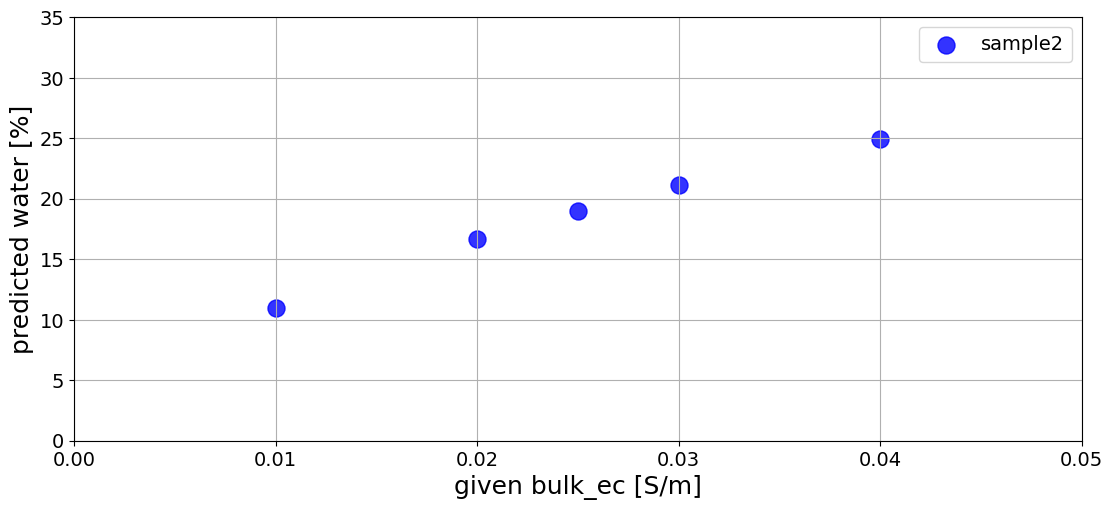

In [38]:
sample2 = Soil( bulk_ec = [0.01, 0.02, 0.025, np.nan, 0.030, 0.040],
                clay = 10,
                porosity = 0.4,
                water_ec = 0.5)

sample2_water = predict.Water(sample2) 
print('sample2_water', sample2_water)
print('sample2.info.water', sample2.info.water)
print('sample2.info.bulk_ec', sample2.info.bulk_ec)

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(13)
ss=150
ax.scatter(sample2.bulk_ec, sample2_water*100, color='blue', alpha=0.8, s=ss, label = "sample2")
ax.set_xlim(0, 0.05)
ax.set_ylim(0, 35)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.set_ylabel('predicted water [%]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.grid(True) 
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Fig10')
plt.show()

##### Similarly, to simulate that every *σ_b* measurement has been obtained in a slightly different soil texture, *Soil.clay* is provided for the six soil states. Then, the prediction of *Soil.water* (in red) considers a dynamic *Soil.clay*.

sample3_water [0.107 0.172 0.185   nan 0.197 0.257]


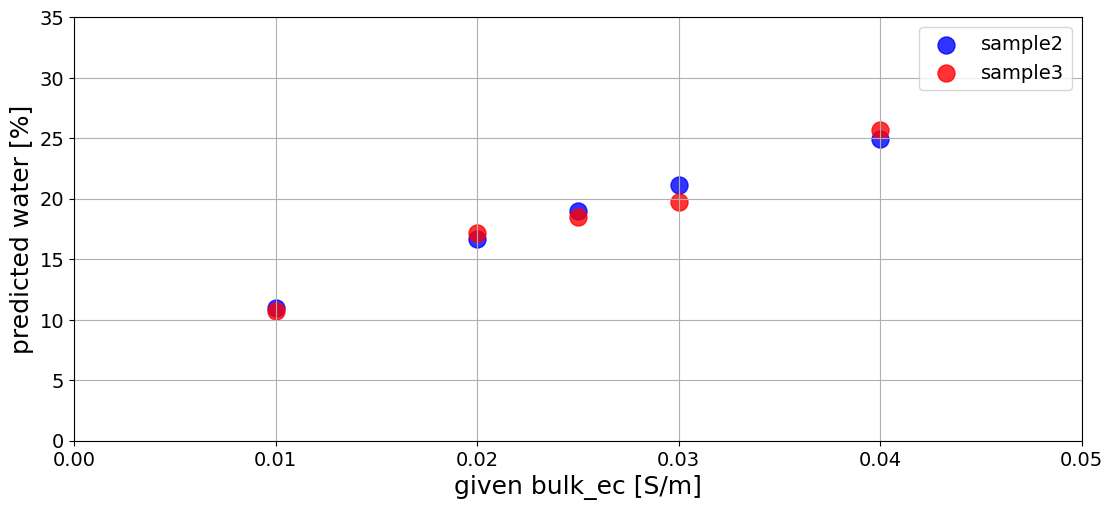

In [39]:
sample3 = Soil(bulk_ec = [0.01, 0.02, 0.025, np.nan, 0.030, 0.040],
                clay = [11, 8, 12, 10, 15, 7],
                porosity = 0.4,
                water_ec = 0.5)

sample3_water = predict.Water(sample3) 
print('sample3_water', sample3_water)

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(13)

ax.scatter(sample2.bulk_ec, sample2.df.water*100, color='blue', alpha=0.8, s=ss, label = "sample2")
ax.scatter(sample3.bulk_ec, sample3.df.water*100, color='red', alpha=0.8, s=ss, label = "sample3")

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 35)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.set_ylabel('predicted water [%]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.grid(True)  
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Fig11')
plt.show()

## Figure 7 and 8. Integrating calibration data.
##### Adding to the last example, the standard use of pedophysical modelling can be optimized by implementing soil-specific solutions. This is normally done by performing a soil-calibration, either in field or laboratory conditions. The present section shows how the decision workflow of pedophysics prioritizes a soil-specific solution over a standard one. 
##### Consider a forward modelling simulation where the effect of ϴ on ε_b measured at 50 MHz is investigated over time. In this example, the Soil instance sample4 is defined with a dynamic *Soil.water* attribute, corresponding to the real-case monitoring data presented by Verhegge et al. (2021). After the prediction of *Soil.bulk_perm*, the metadata in *sample4.info.bulk_perm* shows it was calculated using the LR_MV function, which is a suitable PPM for the given EM frequencies. If no EM frequency is defined for *Soil.bulk_perm* (this is, *Soil.frequency_perm*), the solutions are NaN and the .info advises to provide such attribute. To show how pedophysics automatically completes missing information using PTFs, the attribute Soil.water_perm is printed. Despite the unknown Soil.water_perm, it is calculated using the model of Malmberg & Maryott (1956) (as detailed in *sample4.info.water_perm*). Additionally, because *Soil.porosity* is a mandatory attribute for LR_MV use, this is automatically derived from the given *Soil.bulk_density*.   

In [40]:
# Load the data
monitoring_data = pd.read_csv('monitoring_data.csv', sep=',', header=0)

# Remove trailing ":00" if present and strip leading/trailing spaces
monitoring_data['Timestamps'] = monitoring_data['Timestamps'].str.replace(":00", "", regex=False).str.strip()

# Convert to datetime, specifying dayfirst=True
monitoring_data['Timestamps'] = pd.to_datetime(monitoring_data['Timestamps'], dayfirst=True, errors='coerce')

water_monitoring = monitoring_data.Port5_water.values

sample4 = Soil( water = water_monitoring,
                CEC = 1.6,
                bulk_density = 1.58,
                frequency_perm = 50*10**6)

sample4_bulk_perm = predict.BulkPerm(sample4) 

In [41]:
print('sample4_bulk_perm', sample4_bulk_perm)
print('sample4.info.bulk_perm', sample4.info.bulk_perm)
print('sample4.water_perm', sample4.water_perm)
print('sample4.df.water_perm.values', sample4.df.water_perm.values)
print('sample4.info.water_perm[0]', sample4.info.water_perm[0])
print('sample4.df.porosity.values', sample4.df.porosity.values)
print('sample4.info.porosity[0]', sample4.info.porosity[0])

sample4_bulk_perm [5.734 5.697 5.697 ... 6.103 6.103 6.103]
sample4.info.bulk_perm 0        nan--> Calculated using LR_MV (reported R2=0.93) function in predict.bulk_perm.non_fitting
1        nan--> Calculated using LR_MV (reported R2=0.93) function in predict.bulk_perm.non_fitting
2        nan--> Calculated using LR_MV (reported R2=0.93) function in predict.bulk_perm.non_fitting
3        nan--> Calculated using LR_MV (reported R2=0.93) function in predict.bulk_perm.non_fitting
4        nan--> Calculated using LR_MV (reported R2=0.93) function in predict.bulk_perm.non_fitting
                                                    ...                                            
99656    nan--> Calculated using LR_MV (reported R2=0.93) function in predict.bulk_perm.non_fitting
99657    nan--> Calculated using LR_MV (reported R2=0.93) function in predict.bulk_perm.non_fitting
99658    nan--> Calculated using LR_MV (reported R2=0.93) function in predict.bulk_perm.non_fitting
99659    nan--> C

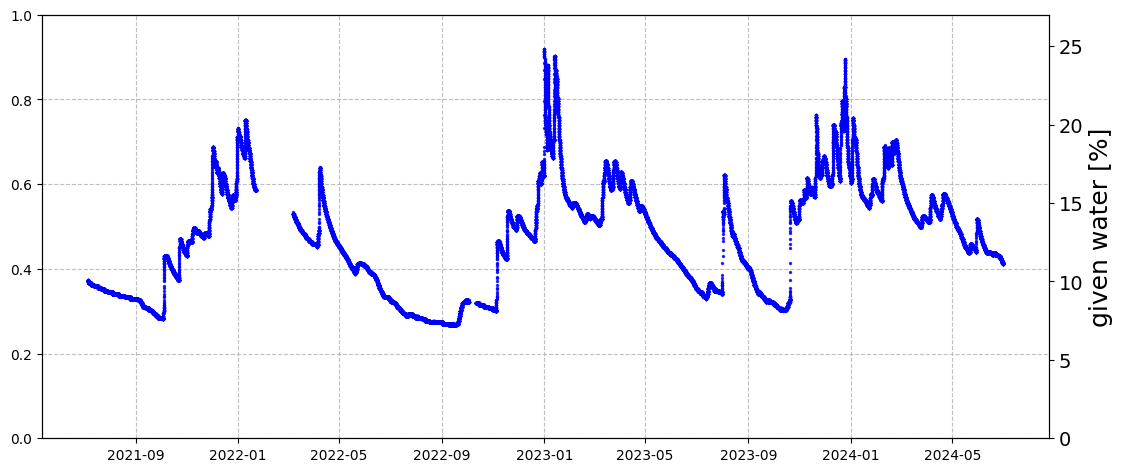

In [42]:
# Create the figure and the first axis
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(13)
ss = 2
aa = 0.8

# Plot sample4c_bulk_perm on the primary y-axis
#ax1.scatter(
#    monitoring_data['Timestamps'],
 #   sample4_bulk_perm,
 #   color='green',
 #   alpha=aa,
 #   s=ss,
 #   label="sample4 predicted bulk_perm [-]"
#)

#ax1.set_ylabel('predicted bulk_perm [-]', fontsize=18)
#ax1.tick_params(axis='y', labelsize=14)
ax1.grid(True, which='both', linestyle='--', alpha=aa)

# Set y-axis range for the primary axis
#ax1.set_ylim(0, 27)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot monitoring_data.Port1_water.values on the secondary y-axis
ax2.scatter(
    monitoring_data['Timestamps'],
    water_monitoring * 100,
    color='blue',
    alpha=aa,
    s=ss,
    label="sample4 water [%]"
)

ax2.set_ylabel('given water [%]', fontsize=18)
ax2.tick_params(axis='y', labelsize=14)

# Set y-axis range for the secondary axis
ax2.set_ylim(0, 27)

# Format x-axis
#ax1.set_xlabel('Time', fontsize=18)
#ax1.tick_params(axis='x', labelsize=14)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=14)

# Show and save the figure
plt.savefig('Fig12')
plt.show()

##### Calibration data was added to sample4 to create sample4b, containing  16 soil states with given *Soil.water* and *Soil.bulk_perm* values. This data was sourced from Mendoza Veirana et al. (2023), using the sample ‘Valthe_N5’ that corresponds to the monitored soil. The first 16 states are the calibration data, with water values concatenated to the monitoring data. The workflow of pedophysics automatically decides for a solution through fitting of the calibration data, plotted in red. This allows to obtain a precise and specific solution that can be extrapolated to different values of Soil.water. A closer look into .info shows that the fitting approach used the WunderlichP function, which provided a good fit of the calibration data. 

In [43]:
calibration_perm = [20.8, 18.2, 16.3, 13.7, 12.3, 11, 10.9, 9.8, 9.1, 8.5, 7.7, 5.8, 5, 4, 3.7, 2.8]

calibration_water = [0.353, 0.349, 0.319, 0.304, 0.283, 0.259, 0.238, 0.224, 
                     0.199, 0.181, 0.169, 0.132, 0.072, 0.057, 0.025, 0.020]

concatenated_water = np.concatenate([calibration_water, water_monitoring])

sample4b = Soil( water = concatenated_water,
                bulk_perm = calibration_perm,
                frequency_perm = 50*10**6,
                CEC = 1.6,
                bulk_density = 1.58)

sample4b_bulk_perm = predict.BulkPerm(sample4b) 

In [44]:
print('sample4b_bulk_perm', sample4b_bulk_perm)
print('sample4b.info.bulk_perm', sample4b.info.bulk_perm)
print('sample4b.water_perm', sample4b.water_perm)
print('sample4b.df.water_perm.values', sample4b.df.water_perm.values)
print('sample4b.df.porosity.values', sample4b.df.porosity.values)
print('sample4b.porosity', sample4b.porosity)
print('sample4b.info.porosity[0]', sample4b.info.porosity[0])# Create the figure and the first axis

sample4b_bulk_perm [20.8   18.2   16.3   ...  5.345  5.345  5.345]
sample4b.info.bulk_perm 0                                                                                                              Value given by the user
1                                                                                                              Value given by the user
2                                                                                                              Value given by the user
3                                                                                                              Value given by the user
4                                                                                                              Value given by the user
                                                                     ...                                                              
99672    nan--> Calculated by fitting (R2=0.967) WunderlichP function in predict.bulk_perm.fitting,

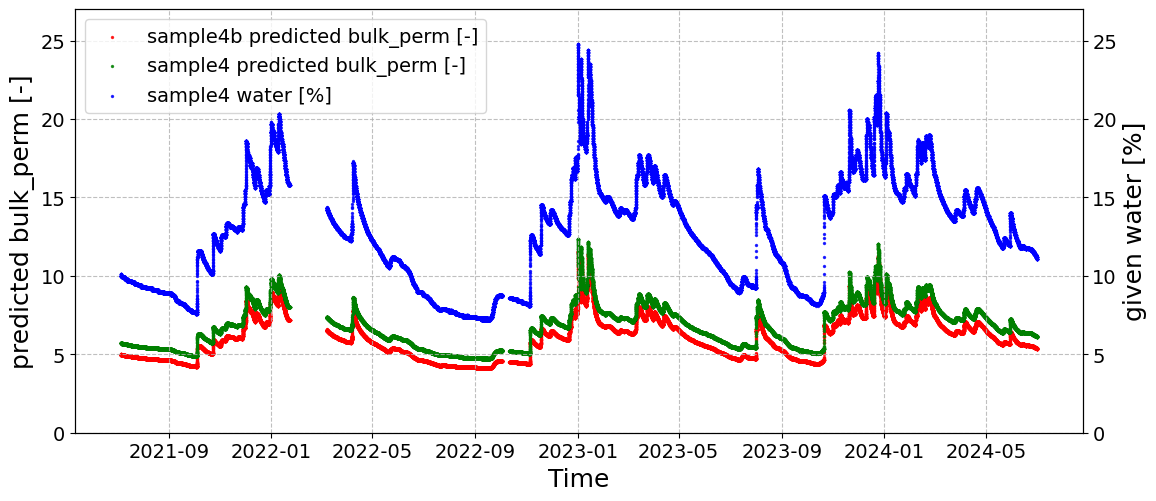

In [45]:
# Create the figure and the first axis
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
fig.set_figheight(5.5)
fig.set_figwidth(13)
ss = 2  # Scatter point size
aa = 0.8  # Transparency

# Plot sample4d_bulk_perm on the primary y-axis
ax1.scatter(
    monitoring_data['Timestamps'],
    sample4b_bulk_perm[len(calibration_perm):],
    color='red',
    alpha=aa,
    s=ss,
    label="sample4b predicted bulk_perm [-]"
)

ax1.scatter(
    monitoring_data['Timestamps'],
    sample4_bulk_perm,
    color='green',
    alpha=aa,
    s=ss,
    label="sample4 predicted bulk_perm [-]"
)

ax1.set_ylabel('predicted bulk_perm [-]', fontsize=18)
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(True, which='both', linestyle='--', alpha=aa)

# Set y-axis range for the primary axis
ax1.set_ylim(0, 27)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot monitoring_data.Port5_water.values on the secondary y-axis
ax2.scatter(
    monitoring_data['Timestamps'],
    monitoring_data['Port5_water'].values * 100,
    color='blue',
    alpha=aa,
    s=ss,
    label="sample4 water [%]"
)

ax2.set_ylabel('given water [%]', fontsize=18)
ax2.tick_params(axis='y', labelsize=14)

# Set y-axis range for the secondary axis
ax2.set_ylim(0, 27)

# Format x-axis
ax1.set_xlabel('Time', fontsize=18)
ax1.tick_params(axis='x', labelsize=14)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=14)

# Show and save the figure
plt.savefig('Fig_combined_bulk_perm_and_water')
plt.show()

## Figure 9 and 10. Dielectric dispersion data
##### This section shows a practical case of geophysical data fusion by considering a field survey using ERT and EMI techniques (both work at different EM frequencies), with *ϴ* as the target. 
##### This scenario is implemented in *pedophysics*, where the survey data is given in *sample5.bulk_ec*, and *sample5.frequency_ec* specifies the EM frequency of acquisition. The first five states correspond to ERT data (in DC regime), and the rest of states to EMI data (observed at 50 kHz). The target *sample5.water* was calculated using *Fu* in a non-fitting approach. Because *Soil.bulk_ec* is given but not *Soil.bulk_ec_dc_tc*, the prints of *.info* detail the conversions (using as example the state 6). The result is plotted and shows different trends for the different techniques, showing that considering EM frequencies in pedophysical modelling is relevant for *ϴ* prediction.

sample5_water [0.15  0.182 0.109 0.142 0.042 0.136 0.167 0.092 0.11  0.054]
sample5.info.water 0    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
1    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
2    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
3    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
4    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
5    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
6    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
7    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
8    nan--> Calculated using Fu function (reported R2=0.98) in predict.water_from_ec.non_fitting
9    nan--> Calculated using Fu 

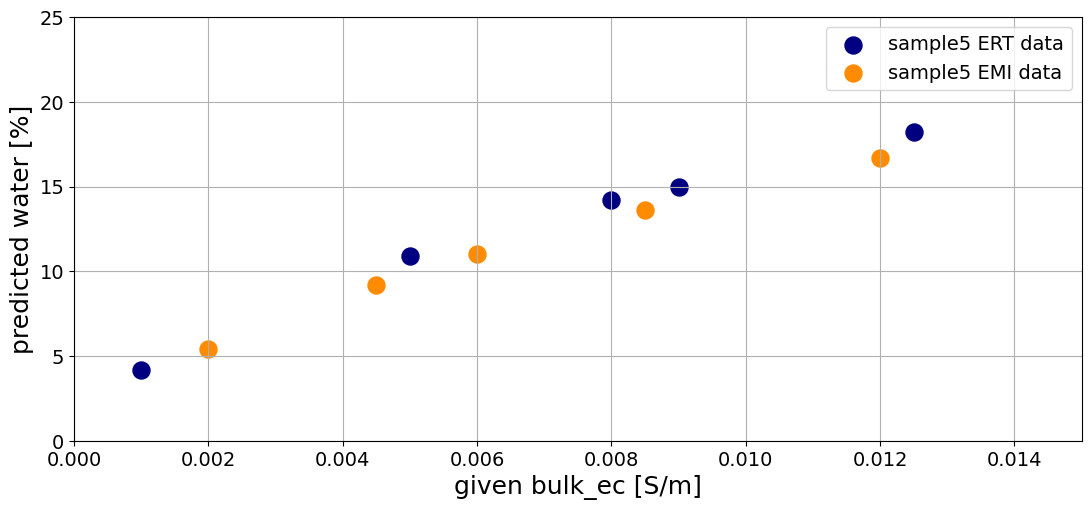

In [46]:
sample5 = Soil( 
    bulk_ec = [0.009, 0.0125, 0.005, 0.008, 0.001, 0.0085, 0.012, 0.0045, 0.006, 0.002],
    frequency_ec = [0, 0, 0, 0, 0, 50e3, 50e3, 50e3, 50e3, 50e3],
    texture = 'Sand', bulk_density= 1.5, water_ec = 0.3)

sample5_water = predict.Water(sample5) 
print('sample5_water', sample5_water)
print('sample5.info.water', sample5.info.water)
print('sample5.info.bulk_ec_dc_tc[6]', sample5.info.bulk_ec_dc_tc[6])
print('sample5.info.bulk_ec_dc[6]', sample5.info.bulk_ec_dc[6])

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample5.bulk_ec[:5], sample5_water[:5]*100, color='navy', alpha=1, s=ss, label = "sample5 ERT data")
ax.scatter(sample5.bulk_ec[5:], sample5_water[5:]*100, color='darkorange', alpha=1, s=ss, label = "sample5 EMI data")
fig.set_figheight(5.5)
fig.set_figwidth(13)

ax.set_ylim(0, 25)
ax.set_xlim(0, 15e-3)
ax.grid(True)
ax.set_ylabel('predicted water [%]', fontsize = 18)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Fig14')
plt.show()

##### Adding to the last example, *sample5b* includes calibration data for the first three soil states; this maybe the case when soil samples for water content are collected in the field along the ERT. Then, the solution for *Soil.water* follows a fitting approach that returned a specific solution (different as that for *sample5*). 

sample5b_water [0.17  0.21  0.115 0.156 0.041 0.148 0.189 0.097 0.117 0.056]
sample5b.info.water 0                                                                                                                                                    Value given by the user
1                                                                                                                                                    Value given by the user
2                                                                                                                                                    Value given by the user
3    nan--> Calculated by fitting (R2=0.999) WunderlichEC function in predict.water_from_ec.fitting, for soil.bulk_ec values between: [np.float64(0.001), np.float64(0.016)]
4    nan--> Calculated by fitting (R2=0.999) WunderlichEC function in predict.water_from_ec.fitting, for soil.bulk_ec values between: [np.float64(0.001), np.float64(0.016)]
5    nan--> Calculated by fitting (R2=

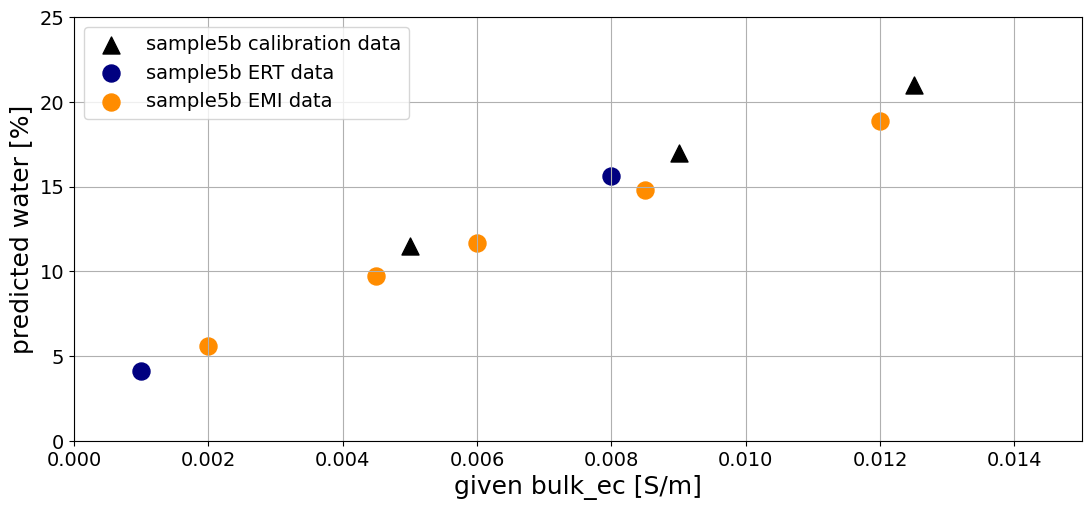

In [47]:
sample5b = Soil( 
    bulk_ec = [0.009, 0.0125, 0.005, 0.008, 0.001, 0.0085, 0.012, 0.0045, 0.006, 0.002],
    water = [0.17, 0.21, 0.115],
    frequency_ec = [0, 0, 0, 0, 0, 50e3, 50e3, 50e3, 50e3, 50e3],
    texture = 'Sand', bulk_density= 1.5)

sample5b_water = predict.Water(sample5b) 
print('sample5b_water', sample5b_water)
print('sample5b.info.water', sample5b.info.water)
print('sample5b.df.water_ec.values', sample5b.df.water_ec.values)
print('sample5b.info.water_ec[0]', sample5b.info.water_ec[0])

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample5b.bulk_ec[:3], sample5b.water[:3]*100, marker = "^", color='black', alpha=1, s=ss, label = "sample5b calibration data")
ax.scatter(sample5b.bulk_ec[3:5], sample5b_water[3:5]*100, color='navy', alpha=1, s=ss, label = "sample5b ERT data")
ax.scatter(sample5b.bulk_ec[5:], sample5b_water[5:]*100, color='darkorange', alpha=1, s=ss, label = "sample5b EMI data")
fig.set_figheight(5.5)
fig.set_figwidth(13)

ax.set_ylim(0, 25)
ax.set_xlim(0, 15e-3)
ax.grid(True)
ax.set_ylabel('predicted water [%]', fontsize = 18)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.legend(loc='upper left', fontsize = 14)

plt.savefig('Fig15')
plt.show()

## Figure 11. Soil salinity
##### In this section, two different approaches for calculating *Soil.water_e*c and *Soil.salinity* are presented as examples. The first case represent a soil measured using TDR, where *σ_b* and *ε_b* are observed, with a reported *σ_w*=0.29 S/m (data from Hamed et al., 2003, Odarslöv topsoil). The data of such a soil is defined in sample6, and the function *predict.WaterEC* is used (Figure 11), obtaining a similar result as the reported. The metadata (in *sample6.info.water_ec*) shows the fitting accuracy (R2 = 0.997) and the used *Hilhorst* function. Additionally, to reproduce the fitting of the calibration data, *Hilhorst* is called with the *sample6* attributes.


sample6_water_ec [0.289855 0.289855 0.289855 0.289855 0.289855]
sample6.info.water_ec 0    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
1    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
2    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
3    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
4    nan--> Calculated by fitting (R2=0.997) Hilhorst function in predict.water_ec.fitting_hilhorst
Name: water_ec, dtype: object


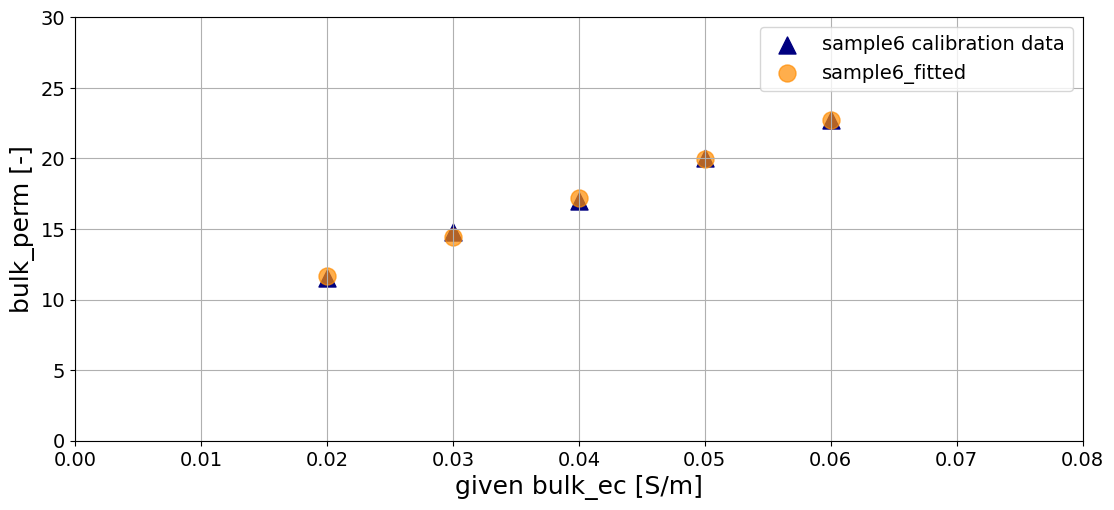

In [48]:
sample6 = Soil(bulk_ec = [0.02, 0.03, 0.04, 0.05, 0.06], 
                bulk_perm = [11.5, 14.8, 17, 20, 22.7],
                clay=5,
                bulk_density=1.48,
                instrument='TDR')

sample6_water_ec = predict.WaterEC(sample6)
print('sample6_water_ec', sample6_water_ec)
print('sample6.info.water_ec', sample6.info.water_ec)
sample6_fitted = Hilhorst(sample6.df.bulk_ec, sample6.df.water_ec, sample6.df.water_perm, sample6.df.offset_perm)

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample6.bulk_ec, sample6.bulk_perm, marker = "^", color='navy', alpha=1, s=ss, label = "sample6 calibration data")
ax.scatter(sample6.bulk_ec, sample6_fitted, color='darkorange', alpha=0.7, s=ss, label = "sample6_fitted")
fig.set_figheight(5.5)
fig.set_figwidth(13)

ax.set_ylim(0, 30)
ax.set_xlim(0, 80e-3)
ax.grid(True)
ax.set_ylabel('bulk_perm [-]', fontsize = 18)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Fig16')
plt.show()

##### A similar case is the example of *sample5b* (Figure 15), where based on the calibration data of Soil.water and *Soil.bulk_ec*, *Soil.water_ec* is automatically calculated (see the print of *sample5b.water_ec* and its metadata) using *Rhoades* (Equation 5). This is because *Soil.water_ec* is a requirement to calculate the target attribute *Soil.water* using *WunderlichEC*. 

## Example using *Rhoades* function with data from Brovelli and Cassiani (2011).

[0.00565 0.00565 0.00565 0.00565 0.00565 0.00565]
0    nan--> Calculated using SenGood function in predict.Salinity
1    nan--> Calculated using SenGood function in predict.Salinity
2    nan--> Calculated using SenGood function in predict.Salinity
3    nan--> Calculated using SenGood function in predict.Salinity
4    nan--> Calculated using SenGood function in predict.Salinity
5    nan--> Calculated using SenGood function in predict.Salinity
Name: salinity, dtype: object
[0.067197 0.067197 0.067197 0.067197 0.067197 0.067197]
0    nan--> Calculated by fitting (R2 = 0.974) Rhoades function in predict.water_ec.fitting_rhoades
1    nan--> Calculated by fitting (R2 = 0.974) Rhoades function in predict.water_ec.fitting_rhoades
2    nan--> Calculated by fitting (R2 = 0.974) Rhoades function in predict.water_ec.fitting_rhoades
3    nan--> Calculated by fitting (R2 = 0.974) Rhoades function in predict.water_ec.fitting_rhoades
4    nan--> Calculated by fitting (R2 = 0.974) Rhoades function in p

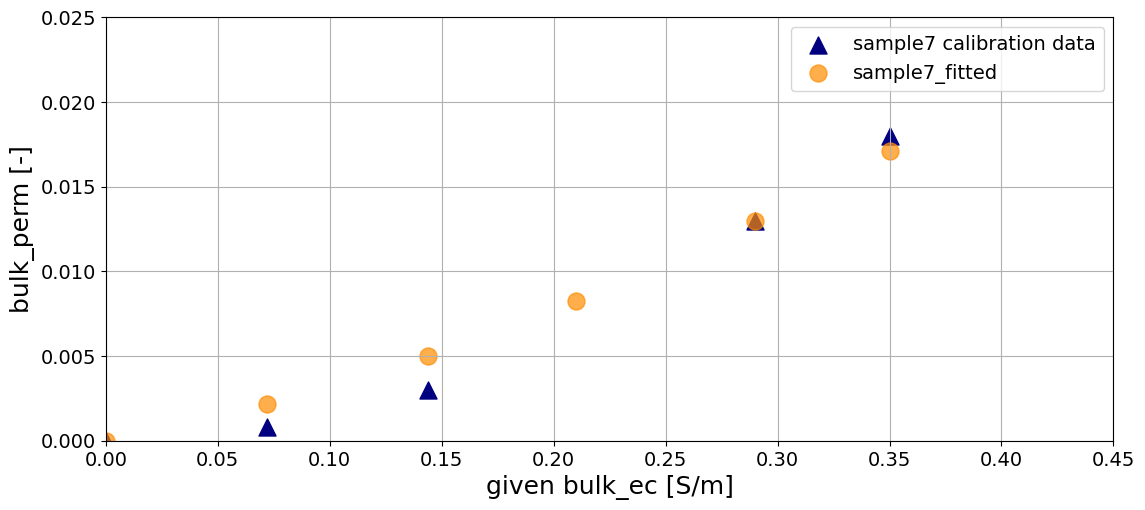

In [49]:
sample7 = Soil(bulk_ec = [0, 8e-4, 3e-3, np.nan, 1.3e-2, 1.8e-2],
                water = [0, 0.072, 0.144, 0.21, 0.29, 0.35],
                clay=5, bulk_density=1.48, instrument = 'TDR')

sample7_salinity = predict.Salinity(sample7)
print(sample7_salinity)
print(sample7.info.salinity)
print(sample7.df.water_ec.values)
print(sample7.info.water_ec)
print('sample7.info.bulk_ec_dc', sample7.info.bulk_ec_dc)
print('sample7.info.bulk_ec', sample7.info.bulk_ec)
print('sample7.info.bulk_ec_dc_tc', sample7.info.bulk_ec_dc_tc)

sample7_fitted = Rhoades(sample7.df.water, sample7.df.water_ec, sample7.df.s_ec, sample7.E, sample7.F)

####################################################### PLOT ############################################

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ss=150
ax.scatter(sample7.water, sample7.bulk_ec, marker = "^", color='navy', alpha=1, s=ss, label = "sample7 calibration data")
ax.scatter(sample7.water, sample7_fitted, color='darkorange', alpha=0.7, s=ss, label = "sample7_fitted")
fig.set_figheight(5.5)
fig.set_figwidth(13)

ax.set_ylim(0, 0.025)
ax.set_xlim(0, 0.45)
ax.grid(True)
ax.set_ylabel('bulk_perm [-]', fontsize = 18)
ax.set_xlabel('given bulk_ec [S/m]', fontsize = 18)
ax.tick_params(axis='y', labelsize=14) 
ax.tick_params(axis='x', labelsize=14) 
ax.legend(loc='upper right', fontsize = 14)

plt.savefig('Rhoades_example')
plt.show()

## What does not work/common pitfalls

In [50]:
sample2 = Soil( bulk_ec = [0.01, 0.02, 0.025, np.nan, 0.030, 0.040],
                #clay = 10,                                          Remember to pass all the necesary soil attributes!
                porosity = 0.4,
                water_ec = 0.5)

sample2_water = predict.Water(sample2) 
print('sample2_water', sample2_water)
print('sample2.info.water', sample2.info.water)
print('sample2.info.bulk_ec', sample2.info.bulk_ec)

sample2_water [nan nan nan nan nan nan]
sample2.info.water 0    nan--> Provide water; otherwise clay, porosity, water_ec and bulk_ec_dc_tc
1    nan--> Provide water; otherwise clay, porosity, water_ec and bulk_ec_dc_tc
2    nan--> Provide water; otherwise clay, porosity, water_ec and bulk_ec_dc_tc
3    nan--> Provide water; otherwise clay, porosity, water_ec and bulk_ec_dc_tc
4    nan--> Provide water; otherwise clay, porosity, water_ec and bulk_ec_dc_tc
5    nan--> Provide water; otherwise clay, porosity, water_ec and bulk_ec_dc_tc
Name: water, dtype: object
sample2.info.bulk_ec 0    Value given by the user
1    Value given by the user
2    Value given by the user
3                        nan
4    Value given by the user
5    Value given by the user
Name: bulk_ec, dtype: object


In [51]:
sample4 = Soil( water = [0.01, 0.1, 0.125, 0.025, 0.05, 0.18, 0.22],
                clay = 20,
                bulk_density = 1.35,
                temperature = 15,    # Remember that 'temperature' is in Kelvin 
                instrument = 'GPR')

sample4_bulk_perm = predict.BulkPerm(sample4) 
print('sample4_bulk_perm', sample4_bulk_perm)
print('sample4.info.bulk_perm', sample4.info.bulk_perm)
print('sample4.water_perm', sample4.water_perm)
print('sample4.df.water_perm.values', sample4.df.water_perm.values)
print('sample4.df.porosity.values', sample4.df.porosity.values)
print('sample4.porosity', sample4.porosity)
print('sample4.info.porosity[0]', sample4.info.porosity[0])

sample4_bulk_perm [ 2.795  6.358  7.535  3.31   4.242 10.383 12.667]
sample4.info.bulk_perm 0    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
1    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
2    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
3    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
4    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
5    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
6    nan--> Calculated using LR_W function in predict.bulk_perm.non_fitting
Name: bulk_perm, dtype: object
sample4.water_perm [nan nan nan nan nan nan nan]
sample4.df.water_perm.values [80 80 80 80 80 80 80]
sample4.df.porosity.values [0.491 0.491 0.491 0.491 0.491 0.491 0.491]
sample4.porosity [nan nan nan nan nan nan nan]
sample4.info.porosity[0] nan--> Calculated based on bulk density
